# Import libraries <a id='imports'></a>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [5]:
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [37]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [120]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [121]:
numvals_df = df.select_dtypes(include=[np.number])
round(numvals_df.corr(),2)

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.00,0.24,0.28,-0.42,-0.24,-0.02,-0.25,0.03,0.07,0.16,...,-0.06,-0.03,-0.13,-0.06,-0.01,-0.08,-0.07,-0.02,-0.06,-0.23
DomainLength,0.24,1.00,-0.04,-0.42,-0.58,0.03,-0.18,0.15,0.40,0.04,...,-0.07,-0.03,-0.20,-0.08,-0.02,-0.10,-0.10,-0.03,-0.07,-0.28
IsDomainIP,0.28,-0.04,1.00,-0.12,-0.10,-0.05,-0.11,-0.01,0.08,0.00,...,-0.01,-0.01,-0.02,-0.02,-0.00,-0.02,-0.02,-0.01,-0.02,-0.06
URLSimilarityIndex,-0.42,-0.42,-0.12,1.00,0.57,0.16,0.57,-0.05,-0.06,-0.10,...,0.29,0.09,0.61,0.24,0.06,0.32,0.27,0.09,0.22,0.86
CharContinuationRate,-0.24,-0.58,-0.10,0.57,1.00,0.24,0.35,0.05,-0.48,-0.04,...,0.18,0.06,0.35,0.14,0.03,0.18,0.15,0.05,0.12,0.47
TLDLegitimateProb,-0.02,0.03,-0.05,0.16,0.24,1.00,0.27,0.39,-0.25,-0.02,...,0.11,0.04,0.11,0.05,0.01,0.06,0.03,0.02,0.03,0.10
URLCharProb,-0.25,-0.18,-0.11,0.57,0.35,0.27,1.00,0.07,-0.08,-0.06,...,0.16,0.06,0.35,0.13,0.03,0.18,0.14,0.05,0.12,0.47
TLDLength,0.03,0.15,-0.01,-0.05,0.05,0.39,0.07,1.00,-0.16,0.00,...,0.02,0.02,-0.04,-0.03,-0.00,-0.02,-0.05,-0.01,-0.03,-0.08
NoOfSubDomain,0.07,0.40,0.08,-0.06,-0.48,-0.25,-0.08,-0.16,1.00,0.02,...,-0.02,-0.02,-0.01,-0.01,-0.00,-0.01,0.00,0.00,-0.00,-0.01
HasObfuscation,0.16,0.04,0.00,-0.10,-0.04,-0.02,-0.06,0.00,0.02,1.00,...,-0.01,-0.00,-0.01,-0.01,-0.00,-0.02,-0.02,-0.00,-0.01,-0.05


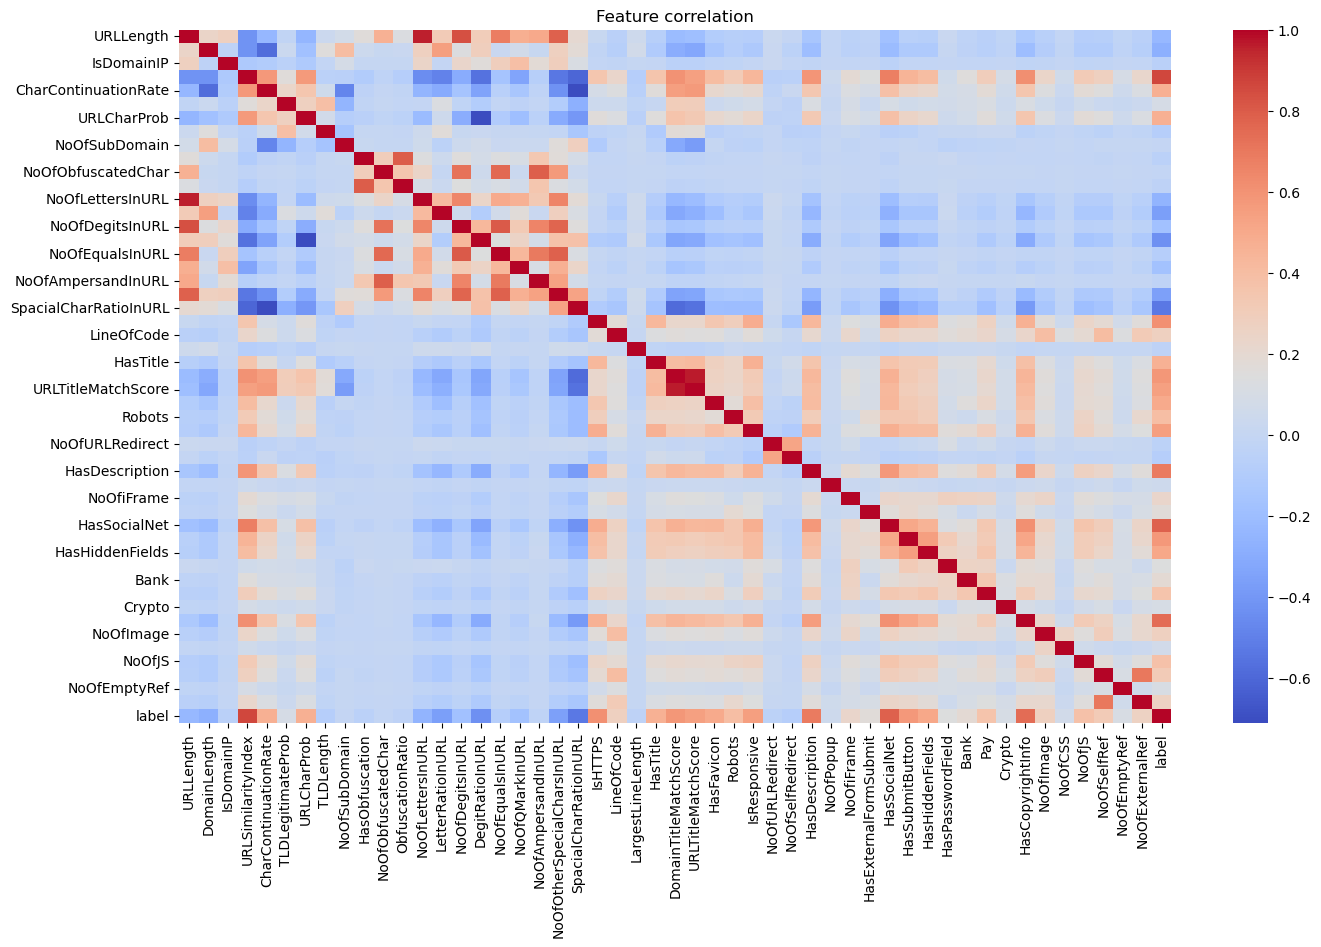

In [122]:
plt.figure(figsize=(16,9))
sns.heatmap(numvals_df.corr(), annot = False, cmap='coolwarm')
plt.title("Feature correlation")
plt.show()

In [ ]:
features = df.select_dtypes(include=['int64','float64']).columns
# Select all numerical features from the DataFrame.

In [174]:
features = features[:-1]
features

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')

In [175]:
X = df[features].copy()
y = df['label'].copy()

In [176]:
X.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)

1. Random Forest Classifier approach

In [ ]:
# We are searching over a few important hyperparameters for the RandomForestClassifier.

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="f1",
    n_jobs=1,
    verbose=2)

In [179]:
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1-Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.6s
[CV] END max_depth=5, min_samples_leaf=

In [180]:
best_model = grid_search.best_estimator_
y_pred_RF = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_best:.4f}")

Accuracy: 1.0000


In [181]:
print( classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33362
           1       1.00      1.00      1.00     44451

    accuracy                           1.00     77813
   macro avg       1.00      1.00      1.00     77813
weighted avg       1.00      1.00      1.00     77813



In [182]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("\nConfusion Matrix:")
print(cm_RF)


Confusion Matrix:
[[33360     2]
 [    0 44451]]


In [ ]:
TN, FP, FN, TP = cm_RF.ravel()
print(f"True Negatives (Legitimate Correctly Classified): {TN}")
print(f"False Positives (Legitimate Classified as Phishing): {FP}")
print(f"False Negatives (Phishing Classified as Legitimate): {FN}")
print(f"True Positives (Phishing Correctly Classified): {TP}")

# This gives a clear understanding of the model's performance in terms of correct and incorrect classifications.


True Negatives (Legitimate Correctly Classified): 33360
False Positives (Legitimate Classified as Phishing): 2
False Negatives (Phishing Classified as Legitimate): 0
True Positives (Phishing Correctly Classified): 44451


We see that under this Random Forest model, we get only 2 false positive classifications

2. Support Vector Machine (SVM) approach

In [184]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_pca, y_train)

y_pred_svm = svm_model.predict(X_test_pca)

In [185]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")

SVM Model Accuracy: 99.96%


In [186]:
svm_scores = cross_val_score(svm_model, X_train_s, y_train, cv=5)
print(f'Cross-validation scores (SVM): {svm_scores}')
print(f'Mean cross-validation score (SVM): {svm_scores.mean()}')

Cross-validation scores (SVM): [0.99958857 0.99965187 0.99971515 0.9998101  0.99971515]
Mean cross-validation score (SVM): 0.9996961688793885


In [187]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix (SVM):\n', cm_svm)

Confusion Matrix (SVM):
 [[33335    27]
 [    2 44449]]


In [189]:
import pickle
with open('model.pkl', 'wb') as f:
     pickle.dump(best_model, f)